## I have used a Naive Bayes Classifier to predict whether a person makes over 50K a year.

### Import Library

In [337]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [338]:
dataset = pd.read_csv('C:\\Users\\Dell\\Desktop\\python books\\ML_Udemy\\Machine Learning A-Z (Codes and Datasets)\\Part 3 - Classification\\Section 18 - Naive Bayes\\Python/adult.csv',header = None)

In [339]:
dataset.describe()

,0,2,4,10,11,12
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [340]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
0     32561 non-null int64
1     32561 non-null object
2     32561 non-null int64
3     32561 non-null object
4     32561 non-null int64
5     32561 non-null object
6     32561 non-null object
7     32561 non-null object
8     32561 non-null object
9     32561 non-null object
10    32561 non-null int64
11    32561 non-null int64
12    32561 non-null int64
13    32561 non-null object
14    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [341]:
dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Renaming Columns name

In [342]:
dataset.columns = ['age','workclass','identity_no','education','education_years','mariatal_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','Country','salary']

In [343]:
dataset.head()

,age,workclass,identity_no,education,education_years,mariatal_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,Country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [344]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                32561 non-null int64
workclass          32561 non-null object
identity_no        32561 non-null int64
education          32561 non-null object
education_years    32561 non-null int64
mariatal_status    32561 non-null object
occupation         32561 non-null object
relationship       32561 non-null object
race               32561 non-null object
sex                32561 non-null object
capital_gain       32561 non-null int64
capital_loss       32561 non-null int64
hours_per_week     32561 non-null int64
Country            32561 non-null object
salary             32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### There is no missing values in dataset

In [345]:
dataset.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [346]:
# find categorcal variable
categorical = [var for var in dataset.columns if dataset[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'mariatal_status', 'occupation', 'relationship', 'race', 'sex', 'Country', 'salary']


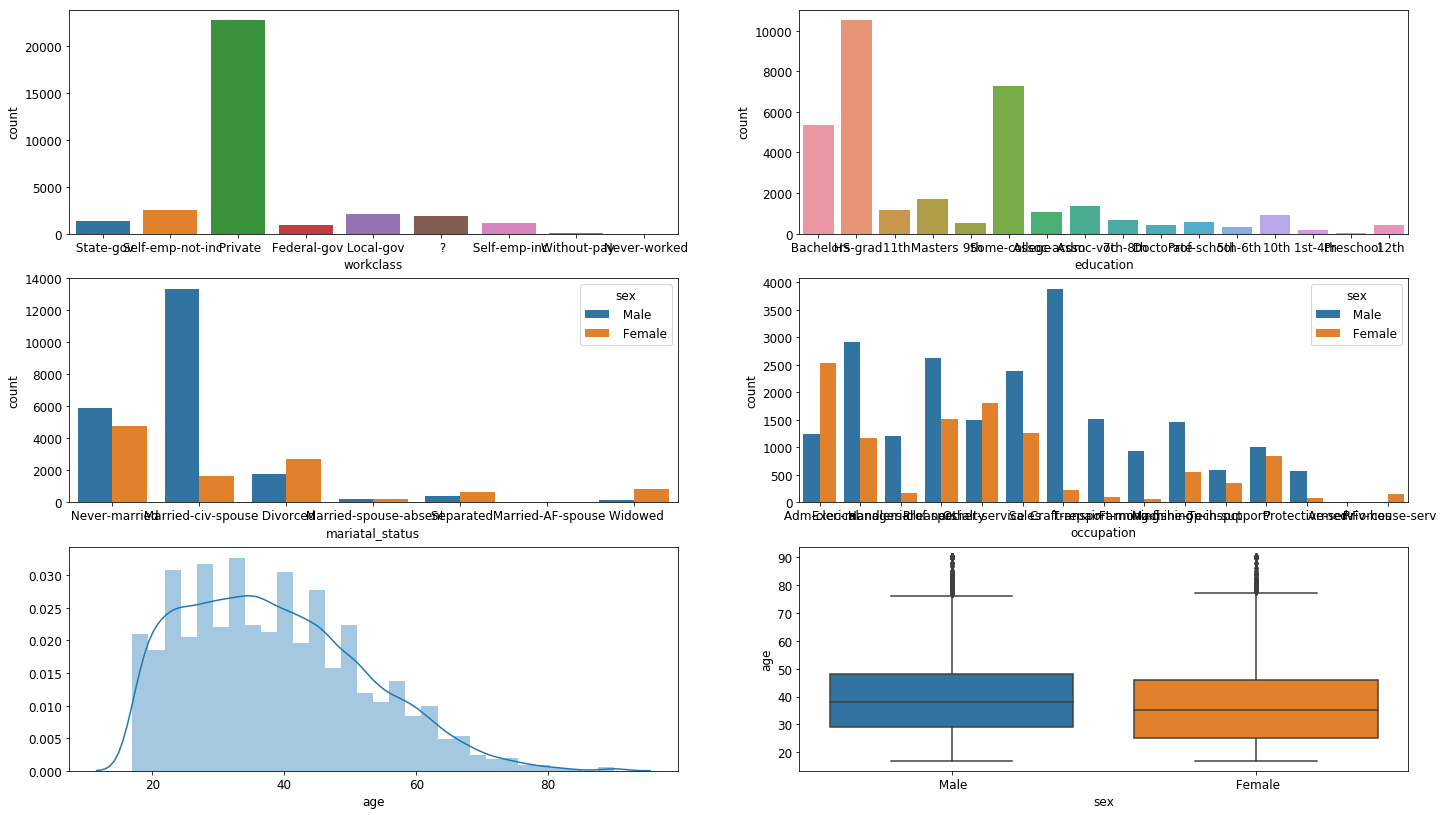

In [347]:
plt.figure(figsize = (24,14))

plt.subplot(3,2,1)
sns.countplot('workclass',data = dataset)

plt.subplot(3,2,2)
sns.countplot('education',data = dataset)

plt.subplot(3,2,3)
sns.countplot('mariatal_status',data = dataset, hue = 'sex')

plt.subplot(3,2,4)
sns.countplot('occupation',data = dataset, hue = 'sex')

plt.subplot(3,2,5)
sns.distplot(dataset['age'],bins=30)

plt.subplot(3,2,6)
sns.boxplot('sex','age',data = dataset)




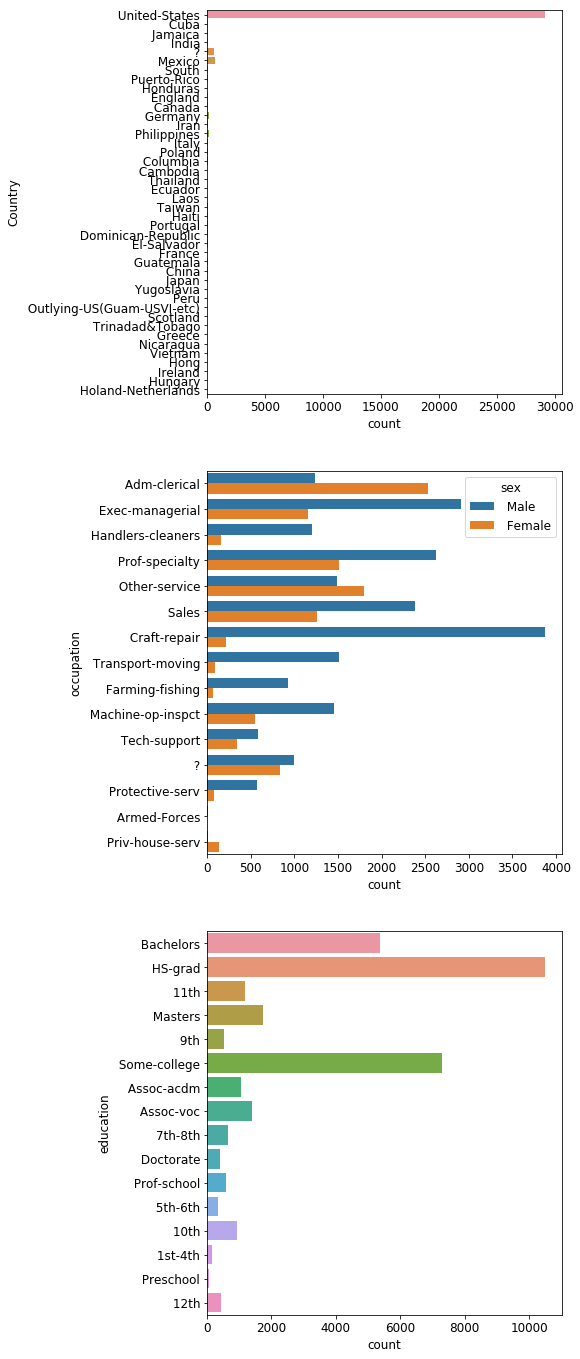

In [348]:
plt.figure(figsize = (14,24))
plt.subplot(3,2,1)
sns.countplot(y= 'Country',data = dataset)

plt.subplot(3,2,3)
sns.countplot(y = 'occupation',data = dataset, hue = 'sex')

plt.subplot(3,2,5)
sns.countplot(y = 'education',data = dataset)

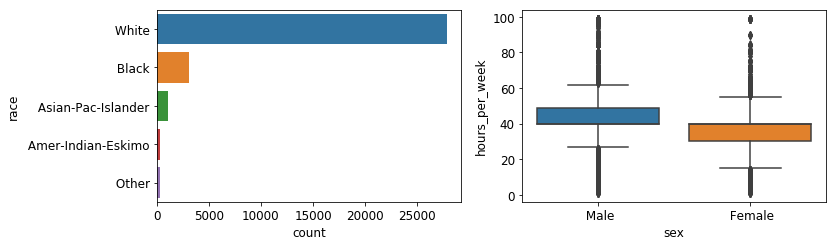

In [349]:
plt.figure(figsize = (12,12))
plt.subplot(3,2,1)
sns.countplot(y = 'race',data = dataset)

plt.subplot(3,2,2)
# sns.boxplot(y = 'race',data = dataset)
sns.boxplot(x= 'sex',y = 'hours_per_week',data = dataset)

## Observations from plot

* Most of the people are working in private sector, second most profession is self employed
* Education wise most of the people have Hs-grade, second most of the studied in some college
* Most of the people of datadet are white and second most are balck
* In each occupation males are leading in jobs except in Adm-clerical job
* Most of the age of people between 30 to 50 years : Avg age of men is slightly higher than female
* Majorly people belongs to USA
* Average working hours for men is more than female coworkers

In [350]:
## There are some ? marks let us convert them as Nan

dataset.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [351]:
dataset.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [352]:
dataset.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [353]:

dataset.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [354]:
## Let us replace all ? by nan in dataset

dataset = dataset.replace(to_replace=' ?', value = np.nan)

In [355]:
dataset.occupation.unique()
# type(dataset.occupation.unique()[11])

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', nan, ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [356]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                32561 non-null int64
workclass          30725 non-null object
identity_no        32561 non-null int64
education          32561 non-null object
education_years    32561 non-null int64
mariatal_status    32561 non-null object
occupation         30718 non-null object
relationship       32561 non-null object
race               32561 non-null object
sex                32561 non-null object
capital_gain       32561 non-null int64
capital_loss       32561 non-null int64
hours_per_week     32561 non-null int64
Country            31978 non-null object
salary             32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Check missing values in categorical variables again

In [357]:
dataset[categorical].isnull().sum()

workclass          1836
education             0
mariatal_status       0
occupation         1843
relationship          0
race                  0
sex                   0
Country             583
salary                0
dtype: int64

In [358]:
dataset.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

## Dropping nan is not good idea

* We will use mode for categorocal variable for missing values
* mean for numerical missing values

In [359]:
# drop all rows containg nan values
# 

# dataset.dropna()

In [360]:
dataset[categorical].isnull().sum()

workclass          1836
education             0
mariatal_status       0
occupation         1843
relationship          0
race                  0
sex                   0
Country             583
salary                0
dtype: int64

## Number of labels: cardinality
The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [361]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(dataset[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
mariatal_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
Country  contains  42  labels
salary  contains  2  labels


## Explore Numerical Variables

In [362]:
# find numerical variables

numerical = [var for var in dataset.columns if dataset[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'identity_no', 'education_years', 'capital_gain', 'capital_loss', 'hours_per_week']


In [363]:
dataset[numerical].head()

,age,identity_no,education_years,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [364]:
dataset[numerical].isnull().sum()

age                0
identity_no        0
education_years    0
capital_gain       0
capital_loss       0
hours_per_week     0
dtype: int64

## Summary of numerical variables
* 6 num variables
* All are discrete data type

# feature vector and target variable

In [365]:
X = dataset.drop(['salary'], axis=1)

y = dataset['salary']

In [366]:
X.head()

,age,workclass,identity_no,education,education_years,mariatal_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,Country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [367]:
y.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: salary, dtype: object

# Split data into training and test set

In [368]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [369]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((22792, 14), (9769, 14))

## Feature Engg

* Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.



In [370]:
# check data types in X_train

X_train.dtypes

age                 int64
workclass          object
identity_no         int64
education          object
education_years     int64
mariatal_status    object
occupation         object
relationship       object
race               object
sex                object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
Country            object
dtype: object

In [371]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'mariatal_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'Country']

In [372]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age',
 'identity_no',
 'education_years',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [373]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

workclass          0.055985
education          0.000000
mariatal_status    0.000000
occupation         0.056072
relationship       0.000000
race               0.000000
sex                0.000000
Country            0.018164
dtype: float64

In [374]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

workclass 0.055984555984555984
occupation 0.05607230607230607
Country 0.018164268164268166


In [375]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['Country'].fillna(X_train['Country'].mode()[0], inplace=True)   

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [376]:
X_train[categorical].isnull().sum()

workclass          0
education          0
mariatal_status    0
occupation         0
relationship       0
race               0
sex                0
Country            0
dtype: int64

In [377]:
## Let us check for X_train and X_test again

X_train.isnull().sum()

age                0
workclass          0
identity_no        0
education          0
education_years    0
mariatal_status    0
occupation         0
relationship       0
race               0
sex                0
capital_gain       0
capital_loss       0
hours_per_week     0
Country            0
dtype: int64

In [378]:
X_test.isnull().sum()

age                0
workclass          0
identity_no        0
education          0
education_years    0
mariatal_status    0
occupation         0
relationship       0
race               0
sex                0
capital_gain       0
capital_loss       0
hours_per_week     0
Country            0
dtype: int64

In [379]:
X_train.shape

(22792, 14)

# Encode categorical variable

In [380]:
for i in categorical:
#     print(X_train[i].unique())
    print(i)


workclass
education
mariatal_status
occupation
relationship
race
sex
Country


In [381]:
X_train.shape

(22792, 14)

In [382]:
# workclass = pd.get_dummies(X_train['workclass'], prefix='workclass')

# X_train = pd.concat([X_train, workclass], axis=1)

In [383]:
# for i in categorical:
    
#     i = pd.get_dummies(X_train[i], prefix=i)
    
#     X_train = pd.concat([X_train, i], axis=1)
    
    

In [384]:
# X_train.shape

In [385]:
# X_train.columns

In [386]:
# X_train.drop(['workclass','education','mariatal_status','occupation','relationship','race','sex','Country'],axis = 1, inplace = True)

In [387]:
# X_train.shape

In [388]:
# X_train.columns

In [389]:
# X_test.shape

In [390]:
# # Similarly we can do for X_test

# for i in categorical:
    
#     i = pd.get_dummies(X_test[i], prefix=i)
    
#     X_test = pd.concat([X_test, i], axis=1)

In [391]:
# X_test.shape

In [392]:
# X_test.drop(['workclass','education','mariatal_status','occupation','relationship','race','sex','Country'],axis = 1, inplace = True)

In [393]:
# X_test.shape

## Better and quick way for encoding 

* use of import category_encoders as ce

In [394]:
# pip install category_encoders

In [395]:
# import category encoders
import category_encoders as ce


In [396]:
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass','education','mariatal_status','occupation','relationship','race','sex','Country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [397]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,identity_no,...,Country_32,Country_33,Country_34,Country_35,Country_36,Country_37,Country_38,Country_39,Country_40,Country_41
32098,45,1,0,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,0,0
25206,47,0,1,0,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,0
23491,48,1,0,0,0,0,0,0,0,187505,...,0,0,0,0,0,0,0,0,0,0
12367,29,1,0,0,0,0,0,0,0,145592,...,0,0,0,0,0,0,0,0,0,0
7054,23,1,0,0,0,0,0,0,0,203003,...,0,0,0,0,0,0,0,0,0,0


In [398]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,identity_no,...,Country_32,Country_33,Country_34,Country_35,Country_36,Country_37,Country_38,Country_39,Country_40,Country_41
22278,27,1,0,0,0,0,0,0,0,177119,...,0,0,0,0,0,0,0,0,0,0
8950,27,1,0,0,0,0,0,0,0,216481,...,0,0,0,0,0,0,0,0,0,0
7838,25,1,0,0,0,0,0,0,0,256263,...,0,0,0,0,0,0,0,0,0,0
16505,46,1,0,0,0,0,0,0,0,147640,...,0,0,0,0,0,0,0,0,0,0
19140,45,1,0,0,0,0,0,0,0,172822,...,0,0,0,0,0,0,0,0,0,0


## Feature Scaling

In [399]:
cols = X_train.columns

In [400]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [401]:
X_train

array([[ 0.47039903,  0.57005457, -0.20228869, ..., -0.03178278,
        -0.03108349, -0.00662397],
       [ 0.61734614, -1.75421802,  4.94342998, ..., -0.03178278,
        -0.03108349, -0.00662397],
       [ 0.69081969,  0.57005457, -0.20228869, ..., -0.03178278,
        -0.03108349, -0.00662397],
       ...,
       [-1.14601919,  0.57005457, -0.20228869, ..., -0.03178278,
        -0.03108349, -0.00662397],
       [ 0.47039903, -1.75421802, -0.20228869, ..., -0.03178278,
        -0.03108349, -0.00662397],
       [-0.99907208,  0.57005457, -0.20228869, ..., -0.03178278,
        -0.03108349, -0.00662397]])

In [402]:
# X_train = pd.DataFrame(X_train, columns=[cols])

In [403]:
# X_train.head()

In [404]:
# X_test = pd.DataFrame(X_test, columns=[cols])

In [405]:
# X_test.head()

## Model training

In [406]:
from sklearn.naive_bayes import GaussianNB

# Instance of model

gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

# Check with different ML models

In [407]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


## Make Function to get report for different ML models

In [408]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

In [409]:
def get_report(model,X_train,y_train,X_test,y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)
    
    # Accuracy score
    acc_train = accuracy_score(y_train,y_pred_train)
    acc_test  = accuracy_score(y_test,y_pred_test)
    
    # f1 score 
    f1_score_train = f1_score(y_train,y_pred_train)
    f1_score_test = f1_score(y_test,y_pred_test)
    
    print('Accuracy Train = %0.2f'%acc_train)
    print('Accuracy Test = %0.2f'%acc_test)
    print('F1 Score Train = %0.2f'%f1_score_train)
    print('F1 Score Test = %0.2f'%f1_score_test)

In [410]:
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [411]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [412]:
y_pred

array([' >50K', ' >50K', ' >50K', ..., ' >50K', ' >50K', ' >50K'],
      dtype='<U6')

In [415]:

# get_report(model,X_train,y_train,X_test,y_test)

GaussianNB(priors=None, var_smoothing=1e-09)

# Check accuracy score

In [416]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.4666


In [417]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_rf)))

Model accuracy score: 0.8445


# Check with Confusion Matrix

In [419]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
# print(cm)

print('Confusion matrix\n\n', cm)

# print('\nTrue Positives(TP) = ', cm[0,0])

# print('\nTrue Negatives(TN) = ', cm[1,1])

# print('\nFalse Positives(FP) = ', cm[0,1])

# print('\nFalse Negatives(FN) = ', cm[1,0])

accuracy_score(y_test, y_pred)

Confusion matrix

 [[2271 5136]
 [  75 2287]]


0.4665779506602518

In [420]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_rf)

print('Confusion matrix\n\n', cm)

# print('\nTrue Positives(TP) = ', cm[0,0])

# print('\nTrue Negatives(TN) = ', cm[1,1])

# print('\nFalse Positives(FP) = ', cm[0,1])

# print('\nFalse Negatives(FN) = ', cm[1,0])

accuracy_score(y_test, y_pred_rf)

Confusion matrix

 [[6885  522]
 [ 997 1365]]


0.8445081379875116

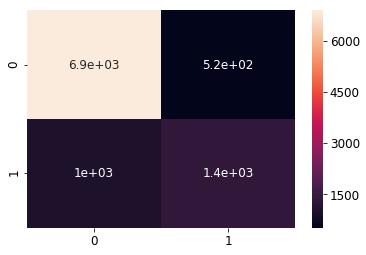

In [421]:
import seaborn as sns
sns.heatmap(cm,annot = True)  
plt.show()

In [422]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [423]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.4672


In [424]:
# check class distribution in test set

y_test.value_counts()

 <=50K    7407
 >50K     2362
Name: salary, dtype: int64

In [425]:
y_train.value_counts()

 <=50K    17313
 >50K      5479
Name: salary, dtype: int64

In [426]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.97      0.31      0.47      7407
        >50K       0.31      0.97      0.47      2362

   micro avg       0.47      0.47      0.47      9769
   macro avg       0.64      0.64      0.47      9769
weighted avg       0.81      0.47      0.47      9769



In [427]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      7407
        >50K       0.72      0.58      0.64      2362

   micro avg       0.84      0.84      0.84      9769
   macro avg       0.80      0.75      0.77      9769
weighted avg       0.84      0.84      0.84      9769



## Random forest classifier gives good result as compared to naives bayes

# Calculate class probabilities

In [428]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_rf = rf.predict_proba(X_test)[0:10]

y_pred_rf

array([[1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1],
       [0.7, 0.3],
       [0.5, 0.5],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [0.7, 0.3],
       [1. , 0. ]])

In [429]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_rf, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,1.0,0.0
1,1.0,0.0
2,0.9,0.1
3,0.7,0.3
4,0.5,0.5
5,0.6,0.4
6,1.0,0.0
7,1.0,0.0
8,0.7,0.3
9,1.0,0.0


In [430]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K

rf.predict_proba(X_test)[0:10, 1]

array([0. , 0. , 0.1, 0.3, 0.5, 0.4, 0. , 0. , 0.3, 0. ])

In [431]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = rf.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

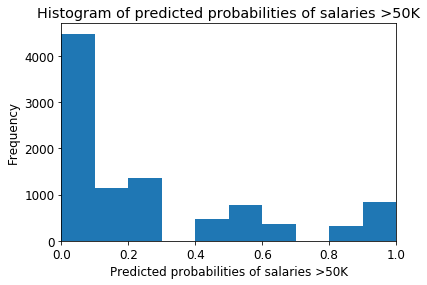

In [432]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')


# set the x-axis limit
plt.xlim(0,1)

# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

In [437]:
# store the predicted probabilities for class 1 - Probability of <50K

y_pred2 = rf.predict_proba(X_test)[:, 0]

Text(0, 0.5, 'Frequency')

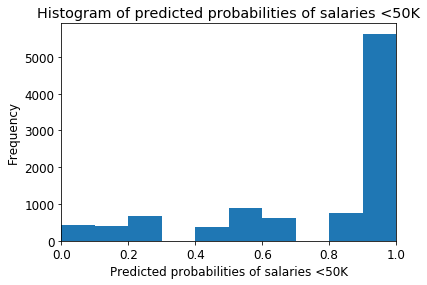

In [438]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred2, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries <50K')


# set the x-axis limit
plt.xlim(0,1)

# set the title
plt.xlabel('Predicted probabilities of salaries <50K')
plt.ylabel('Frequency')

# ROC - AUC

Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

True Positive Rate (TPR) is also called Recall. It is defined as the ratio of TP to (TP + FN).

False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).

In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives

# k-Fold Cross Validation

In [444]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.84736842 0.85482456 0.84649123 0.85344449 0.83940325 0.8451075
 0.85256692 0.8490566  0.83457657 0.85381914]


In [447]:
scores.max()

0.8548245614035088

In [445]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8477


### Interpretation

* Using the mean cross-validation, we can conclude that we expect the model to be around 84.7% accurate on average.

* If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively small variance in the accuracy between folds, ranging from 83.45% accuracy to 85.48% accuracy. So, we can conclude that the model is independent of the particular folds used for training.

* Our original model accuracy is 0.84, but the mean cross-validation accuracy is 0.847. So, the 10-fold cross-validation accuracy does not result in performance improvement for this model.